In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [9]:
df_train_salaries = pd.read_csv('/train_salaries.csv', header=0, sep=',', quotechar='"')
df_train_salaries.tail()

df_train_features = pd.read_csv('/train_features.csv', header=0, sep=',', quotechar='"')
df_train_features.tail()

df_test_features = pd.read_csv('/test_features.csv', header=0, sep=',', quotechar='"')
df_test_features.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
999995,JOB1362686407682,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,JOB1362686407683,COMP5,MANAGER,NONE,NONE,HEALTH,20,67
999997,JOB1362686407684,COMP61,JANITOR,NONE,NONE,OIL,1,91
999998,JOB1362686407685,COMP19,CTO,DOCTORAL,MATH,OIL,14,63
999999,JOB1362686407686,COMP34,JUNIOR,NONE,NONE,OIL,16,31


### EDA

In [10]:
df_train_salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


### Understanding data

In [11]:
print(" \n Train salaries \n")

df_train_salaries.tail().info()

print(" \n Train features \n")

df_train_features.tail().info()

print(" \n Test features \n")

df_test_features.tail().info()

 
 Train salaries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 999995 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   jobId   5 non-null      object
 1   salary  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
 
 Train features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 999995 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   jobId                5 non-null      object
 1   companyId            5 non-null      object
 2   jobType              5 non-null      object
 3   degree               5 non-null      object
 4   major                5 non-null      object
 5   industry             5 non-null      object
 6   yearsExperience      5 non-null      int64 
 7   milesFromMetropolis  5 non-null      int64 
dtypes: int64(2), object(6)
memory usage: 452.0+ by

### Null Values Handling

In [12]:
print(" \n Train features \n")

print(" in train dataset \n\n",df_train_features.isna().sum())


print(" \n Test features \n")

print("Null Values in test dataset \n\n",df_test_features.isna().sum())

print(" \n Train salaries \n")

print("Null Values in train salaries dataset \n\n",df_train_salaries.isna().sum())




 
 Train features 

 in train dataset 

 jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64
 
 Test features 

Null Values in test dataset 

 jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64
 
 Train salaries 

Null Values in train salaries dataset 

 jobId     0
salary    0
dtype: int64


In [13]:
print(df_train_features.head(5))
print(len(df_train_features))

print(df_train_salaries.head(5))
print(len(df_train_salaries))

print(df_test_features.head(5))
print(len(df_test_features))

#combined the features and salaries in the training data
training_df = pd.merge(df_train_features,df_train_salaries, how = 'inner', on = 'jobId')
print(training_df.head(5))
print(len(training_df))

#look for duplicated data and invalid data
training_df = training_df.drop_duplicates(subset="jobId")

print(len(training_df))

test_df = df_test_features.drop_duplicates(subset="jobId")
print(len(test_df))

              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  
1000000
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
1000000
              jobId companyId  jobType       degree    major industry  

In [14]:
# summarize
training_df.info()
training_df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362684407687,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


### feature engineering


In [15]:
# min salary is 0, removing unnecessary rows
print(training_df.loc[training_df["salary"]==0])

                   jobId companyId         jobType       degree        major  \
30559   JOB1362684438246    COMP44          JUNIOR     DOCTORAL         MATH   
495984  JOB1362684903671    COMP34          JUNIOR         NONE         NONE   
652076  JOB1362685059763    COMP25             CTO  HIGH_SCHOOL         NONE   
816129  JOB1362685223816    COMP42         MANAGER     DOCTORAL  ENGINEERING   
828156  JOB1362685235843    COMP40  VICE_PRESIDENT      MASTERS  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  salary  
30559      AUTO               11                    7       0  
495984      OIL                1                   25       0  
652076     AUTO                6                   60       0  
816129  FINANCE               18                    6       0  
828156      WEB                3                   29       0  


In [16]:
def convert_to_category(df, col):
    df[col] = df[col].astype('category')
    return df

In [17]:
# converting features into categorical

training_df = convert_to_category(training_df, 'companyId')
training_df = convert_to_category(training_df, 'jobType')
training_df = convert_to_category(training_df, 'degree')
training_df = convert_to_category(training_df, 'major')
training_df = convert_to_category(training_df, 'industry')
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   jobId                1000000 non-null  object  
 1   companyId            1000000 non-null  category
 2   jobType              1000000 non-null  category
 3   degree               1000000 non-null  category
 4   major                1000000 non-null  category
 5   industry             1000000 non-null  category
 6   yearsExperience      1000000 non-null  int64   
 7   milesFromMetropolis  1000000 non-null  int64   
 8   salary               1000000 non-null  int64   
dtypes: category(5), int64(3), object(1)
memory usage: 42.9+ MB


<ipython-input-18-4d1bacd1c809>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_df.salary, bins = 20)


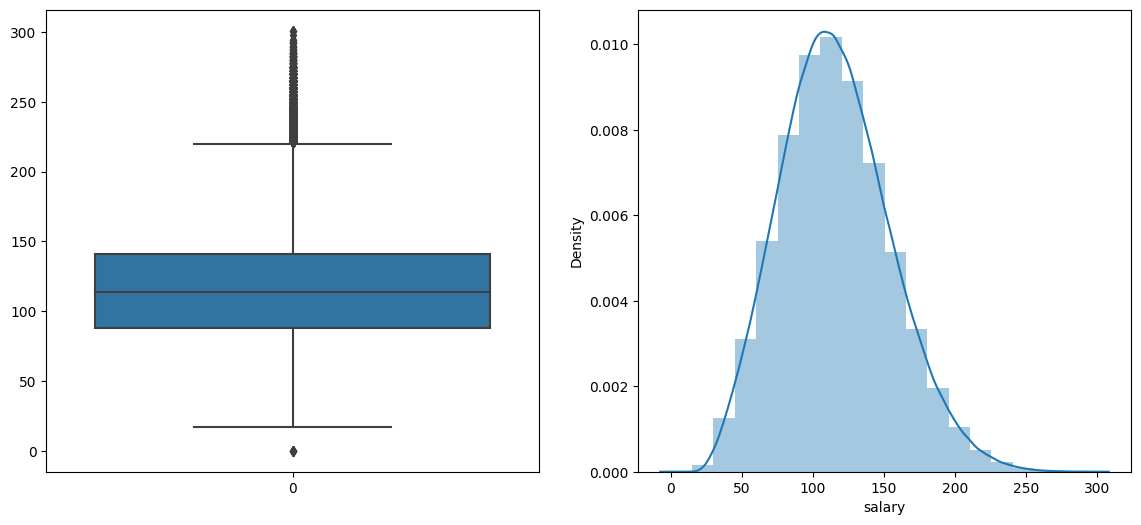

In [18]:
# salary Normal distribution

plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(training_df.salary)
plt.subplot(1, 2, 2)
sns.distplot(training_df.salary, bins = 20)
plt.show()

In [19]:
# if value_counts < 20 or if the variable is not numeric, print the value_count table

# if the variable is numeric, make density plot for frequency, and lineplot for interaction with the target variable

# if the variable is categorical and number of category is less than 20,

def feature_plot(df, target, col):
    categories = df[col].value_counts().index.to_list()
    n_categories = len(categories)
    if n_categories < 20 or df[col].dtype != 'int64':
        print(df[col].value_counts())

    plt.figure(figsize = (14,10))
    if df[col].dtype == 'int64':
        plt.subplot(2,1,1)
        if n_categories < 30:
            sns.distplot(df[col], bins = n_categories)
        else:
            sns.distplot(df[col], bins = 20)
        plt.subplot(2,1,2)
        sns.lineplot(x = col, y = target, data = df)
    else:
        if n_categories < 20:
            plt.subplot(2,1,1)
            sns.countplot(x = col, data = df)
            plt.subplot(2,1,2)
            sns.boxplot(x = col, y = target, data = df)
    plt.show()


SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64


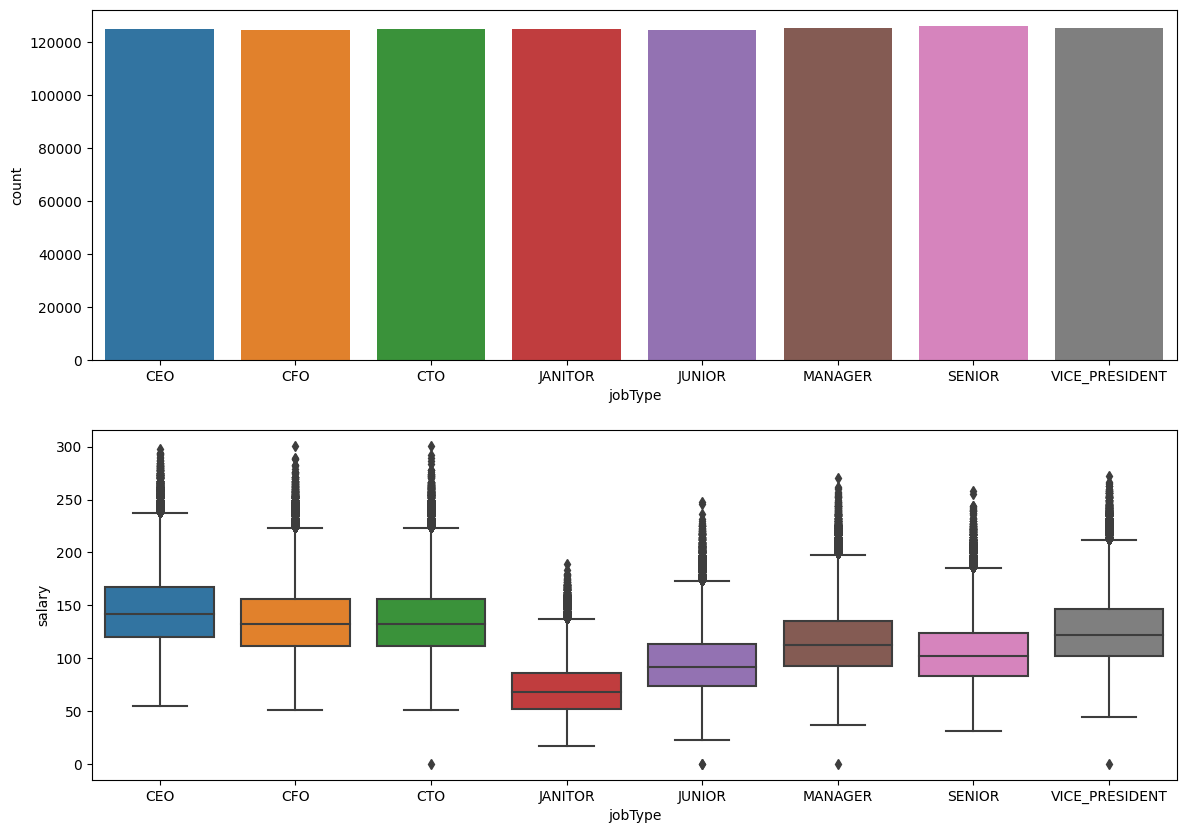

In [20]:
feature_plot(training_df, 'salary','jobType')


NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64


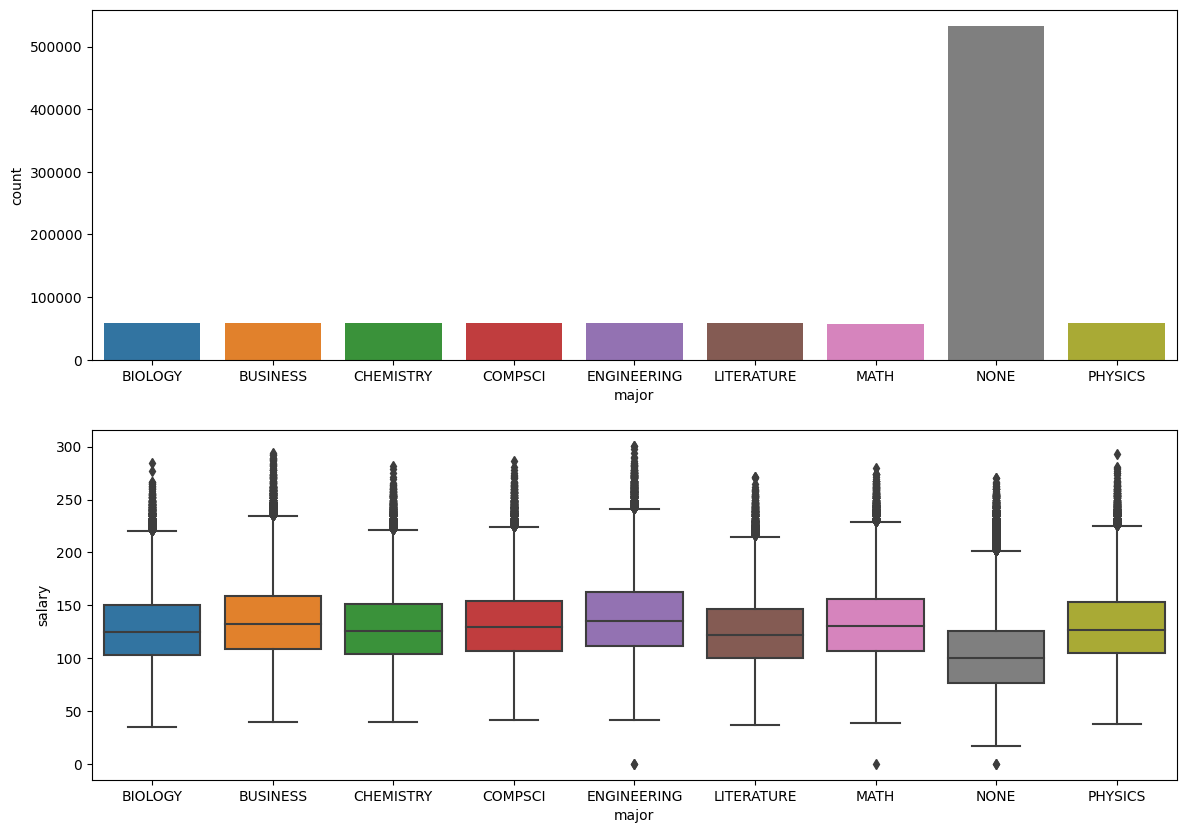

In [22]:
feature_plot(training_df, 'salary','major')

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


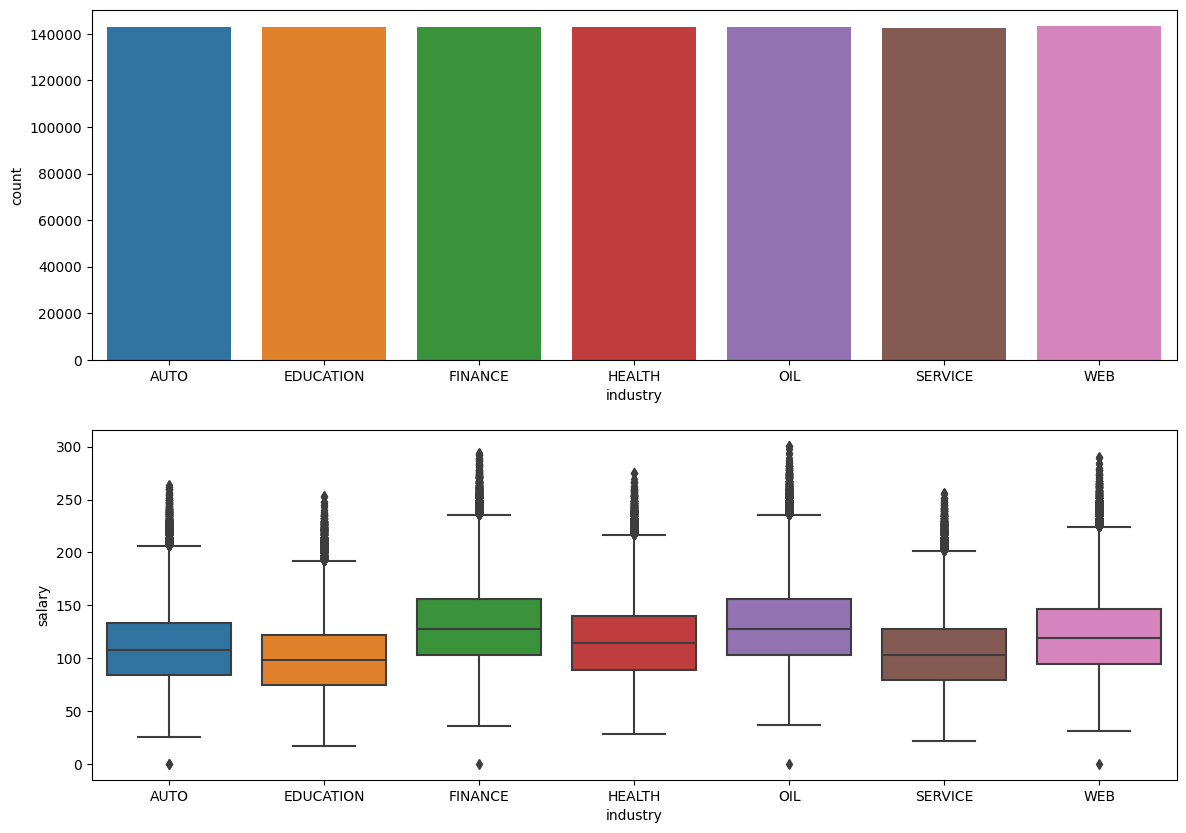

In [23]:
feature_plot(training_df, 'salary','industry')

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64


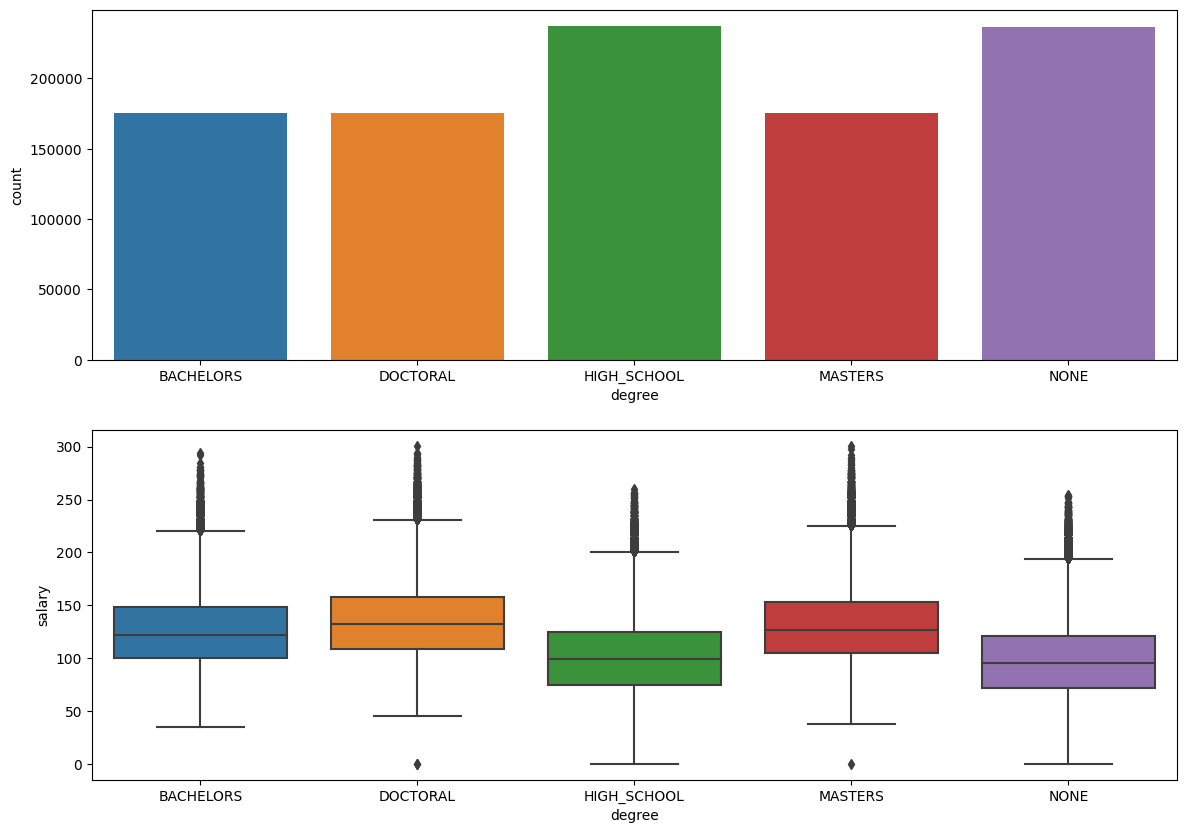

In [24]:
feature_plot(training_df, 'salary','degree')


<ipython-input-19-fb64fff6c06f>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins = n_categories)


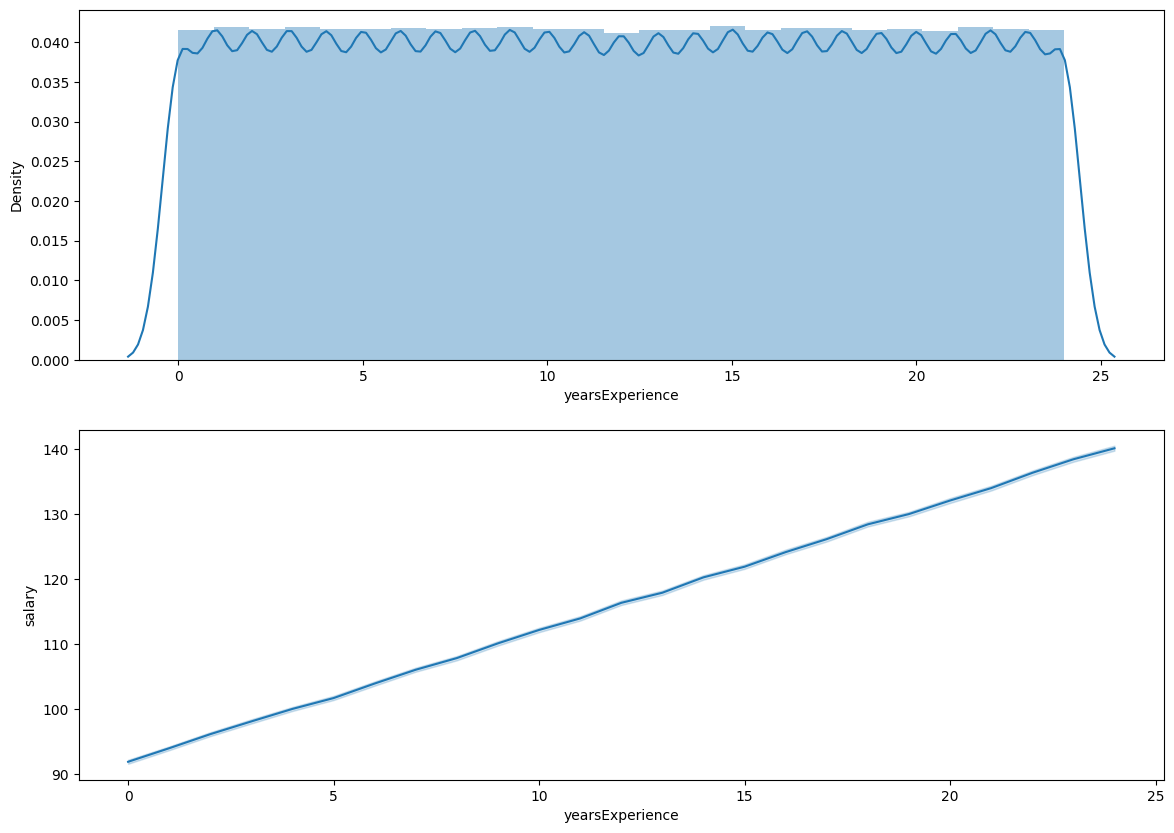

In [25]:
feature_plot(training_df, 'salary','yearsExperience')

<ipython-input-19-fb64fff6c06f>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins = 20)


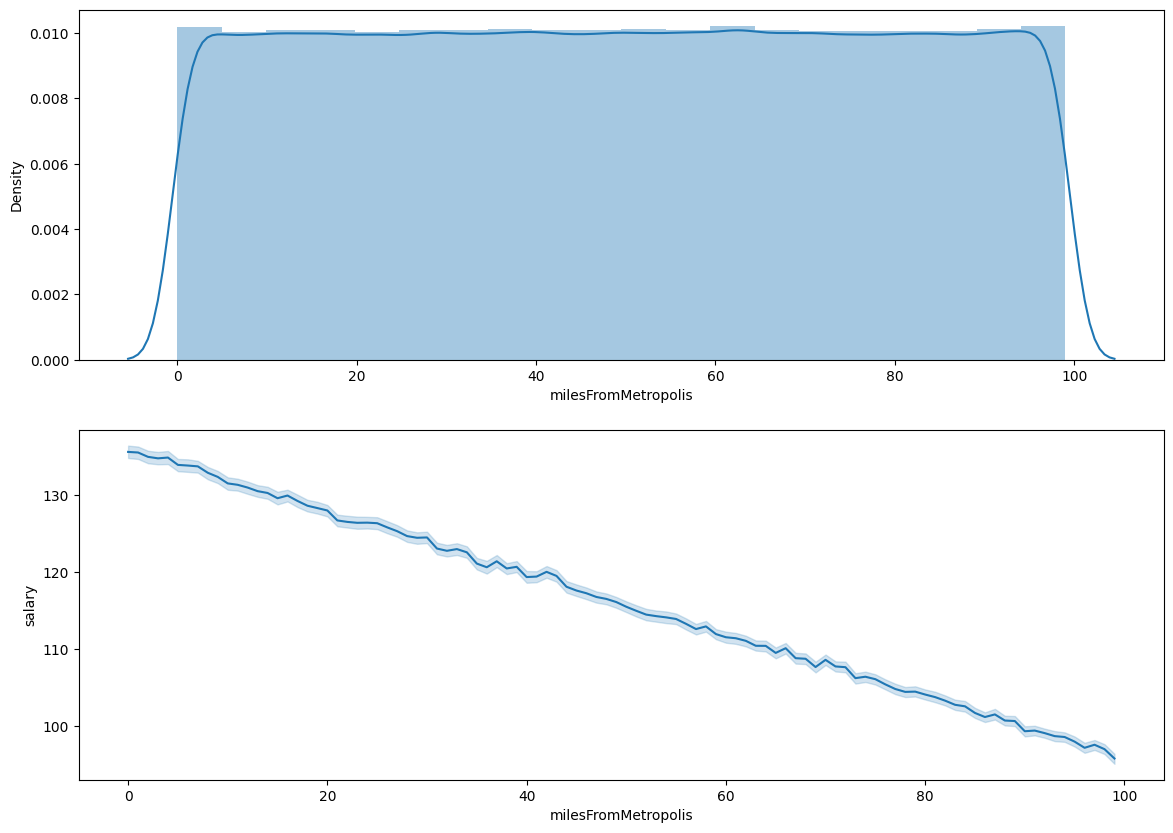

In [26]:
feature_plot(training_df,'salary','milesFromMetropolis')

### handling outliers

In [32]:
def outliers(df, col):
    stat = df[col].describe()
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for variable {} are {} and {}'.format(col, upper, lower))
    return lower, upper

In [33]:

lower_boundries, upper_boundries = outliers(training_df, 'salary')


The upper and lower bounds for variable salary are 220.5 and 8.5


In [34]:
# outliers above lower bounds
upper_outliers = training_df[training_df.salary > upper_boundries]
print(upper_outliers.shape)
upper_outliers.jobType.value_counts()

(7117, 9)


CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
JANITOR              0
Name: jobType, dtype: int64

In [35]:
upper_outliers[upper_outliers['jobType'] == 'JUNIOR']

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


## Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
def categorical_encoding(training, test):
    from sklearn import preprocessing
    cols = training.select_dtypes(include=['category']).columns.to_list()
    for col in cols:
        le = preprocessing.LabelEncoder()
        le.fit(training[col])
        training[col+'_encoded'] = le.transform(training[col])
        test[col+'_encoded'] = le.transform(test[col])
    return training, test


In [39]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, column, target_column):
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[column])
    return df



<ipython-input-43-91cb19429c54>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

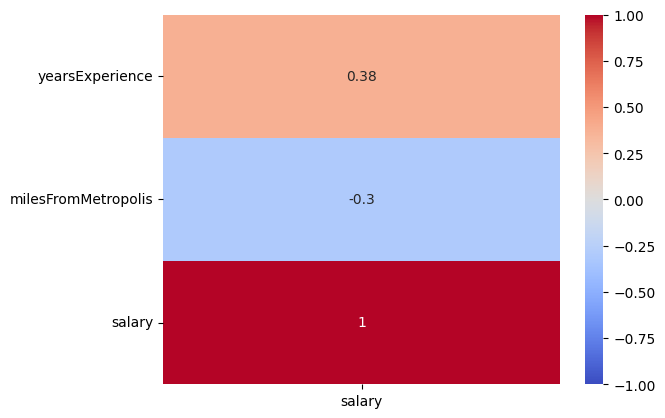

In [43]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'data' with columns: jobType, degree, major, industry, yearsExperience, milesFromMetropolis, and salary

# Encode categorical variables with the mean of the salary for each category
def encode_categorical_with_mean(df, cat_column, target_column):
    le = LabelEncoder()
    df[cat_column + '_encoded'] = le.fit_transform(df[cat_column])
    category_mean_salary = df.groupby(cat_column)[target_column].mean().to_dict()
    df[cat_column + '_encoded'] = df[cat_column].map(category_mean_salary)
    return df

categorical_columns = ['jobType', 'degree', 'major', 'industry']

for column in categorical_columns:
    data = encode_categorical_with_mean(training_df, column, 'salary')

# Plot feature correlation with salary
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix[['salary']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)


In [62]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, column, target_column):
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[column])
    return df

# Example usage
training_test = label_encode(training_copy, 'major', 'salary')


In [63]:
training_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   jobId                1000000 non-null  object  
 1   companyId            1000000 non-null  category
 2   jobType              1000000 non-null  category
 3   degree               1000000 non-null  category
 4   major                1000000 non-null  category
 5   industry             1000000 non-null  category
 6   yearsExperience      1000000 non-null  int64   
 7   milesFromMetropolis  1000000 non-null  int64   
 8   salary               1000000 non-null  int64   
 9   jobType_encoded      1000000 non-null  category
 10  degree_encoded       1000000 non-null  category
 11  major_encoded        1000000 non-null  category
 12  industry_encoded     1000000 non-null  category
dtypes: category(9), int64(3), object(1)
memory usage: 46.7+ MB


In [67]:
training_copy = training_df[:]
for col in training_copy.columns:
    if training_copy[col].dtype.name == 'category':
        # training_copy[col]=label_encode(training_copy, col, 'salary')
        # training_copy[col] = training_copy[col].astype('int64')
        print(training_copy[col])

# training_copy.head()
# training_copy.info()

COMP19
CEO
HIGH_SCHOOL
NONE
WEB
145.31142509096154
101.92065441226116
102.58347906941796
121.64451210144826


<ipython-input-49-a7bedb10940f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training_copy[features + ['salary']].corr(), cmap = 'BuPu', annot=True)


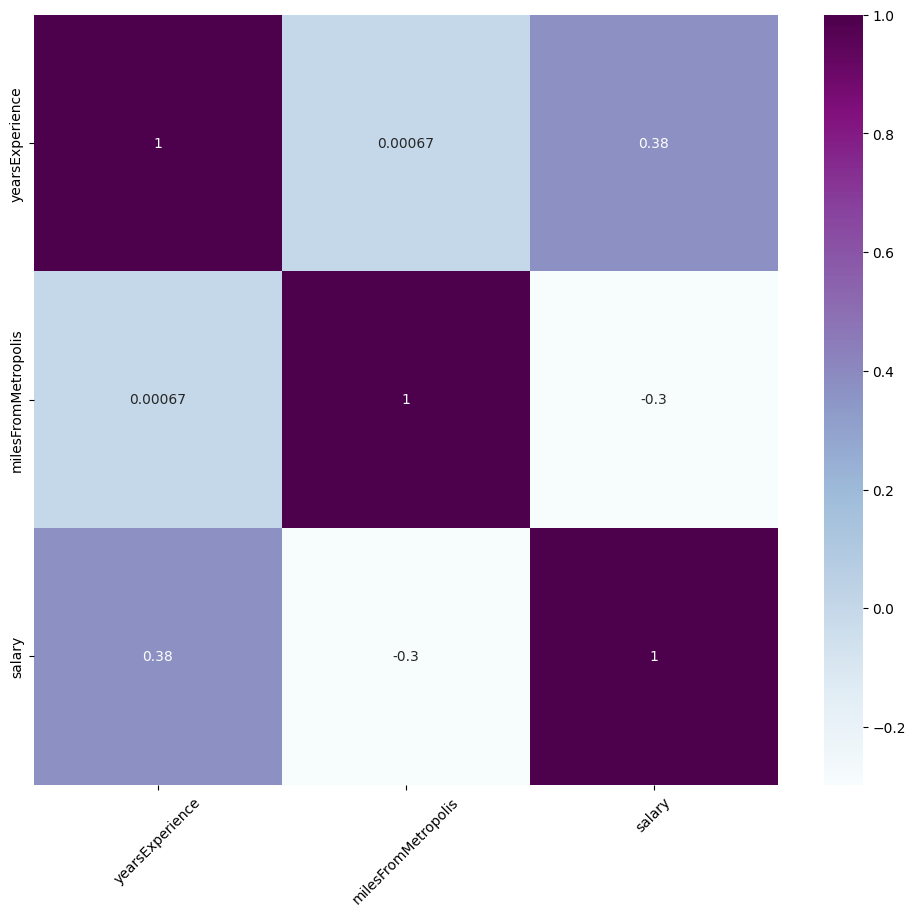

In [49]:
fig = plt.figure(figsize = (12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(training_copy[features + ['salary']].corr(), cmap = 'BuPu', annot=True)
plt.xticks(rotation = 45)
plt.show()

In [70]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming you have a DataFrame called 'data' with columns: industry, salary

# Custom Transformer to calculate mean salary for each industry
class MeanSalaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_salaries = None

    def fit(self, X, y=None):
        self.mean_salaries = X.groupby('industry')['salary'].mean().to_dict()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['mean_salary'] = X_copy['industry'].map(self.mean_salaries)
        return X_copy[['mean_salary']]

    def predict(self, X):
        # Since this is a simple model, we can just return the mean_salary values
        return X['mean_salary']

# Initialize the MeanSalaryTransformer
mean_salary_transformer = MeanSalaryTransformer()

# Apply 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a simple model pipeline
from sklearn.pipeline import make_pipeline

simple_model = make_pipeline(mean_salary_transformer)

# Use negative RMSE as cross_val_score expects a scoring function where higher is better
rmse_scores = cross_val_score(simple_model, data, data['salary'], cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE
rmse_scores = pd.Series(-rmse_scores)
rmse = rmse_scores.apply(lambda x: (abs(x))**0.5)

print("Root Mean Squared Error (RMSE) for the simple model:", rmse.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'mean_salary'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in 

Root Mean Squared Error (RMSE) for the simple model: nan


In [76]:

def salary_get_variable_list():
    variable_list = ['companyId', 'jobType', 'degree', 'major', 'industry']
    return variable_list

#transform a variable based on the average of the target variable of each value
#for example, transfor each industry into the averaged salary of each industry
def transform_categorical(df, col, target, training_df):
    category_mean = {}
    value_list = df[col].cat.categories.tolist()
    for value in value_list:
        category_mean[value] = training_df[training_df[col] == value][target].mean()
    df[col+'_transformed'] = df[col].map(category_mean)
    df[col+'_transformed'] = df[col+'_transformed'].astype('int64')
    return df


#make sure training and test has the same categorical variables
def encode_categorical(training, test):
    from sklearn import preprocessing
    cols = training.select_dtypes(include=['category']).columns.to_list()
    for col in cols:
        le = preprocessing.LabelEncoder()
        le.fit(training[col])
        training[col+'_encoded'] = le.transform(training[col])
        test[col+'_encoded'] = le.transform(test[col])
    return training, test

def convert_to_category(df, col):
    df[col] = df[col].astype('category')
    return df

def drop_duplicates(df, col):
    df = df.drop_duplicates(subset = col)
    return df


In [77]:

def salary_preprocess():
    #define constants
    variable_list = salary_get_variable_list()
    target = 'salary'

    #read the data and merge feature and salary for the training data
    features = pd.read_csv('/train_features.csv')
    salaries = pd.read_csv('/train_salaries.csv')
    test = pd.read_csv('/test_features.csv')
    training = pd.merge(features,salaries, how = 'inner', on = 'jobId')

    #remove duplicates
    training = drop_duplicates(training,'jobId')
    test = drop_duplicates(test,'jobId')

    #remove salary = 0 in the training set
    training = training.drop(training[training[target]==0].index)

    #convert object to categorial variables
    #and transform them based on mean target (salary)
    for variable in variable_list:
        training = convert_to_category(training, variable)
        training = transform_categorical(training, variable, target, training)
        test = convert_to_category(test, variable)
        test = transform_categorical(test, variable, target, training)

    #encode categorical variables to dummies
    training, test = encode_categorical(training, test)

    #save scaler for later

    #print results on the screen
    training.info()
    training.head()
    test.info()
    test.head()
    return training, test


training, test = salary_preprocess()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   jobId                  999995 non-null  object  
 1   companyId              999995 non-null  category
 2   jobType                999995 non-null  category
 3   degree                 999995 non-null  category
 4   major                  999995 non-null  category
 5   industry               999995 non-null  category
 6   yearsExperience        999995 non-null  int64   
 7   milesFromMetropolis    999995 non-null  int64   
 8   salary                 999995 non-null  int64   
 9   companyId_transformed  999995 non-null  int64   
 10  jobType_transformed    999995 non-null  int64   
 11  degree_transformed     999995 non-null  int64   
 12  major_transformed      999995 non-null  int64   
 13  industry_transformed   999995 non-null  int64   
 14  companyId_encoded   

In [78]:
training.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,companyId_transformed,jobType_transformed,degree_transformed,major_transformed,industry_transformed,companyId_encoded,jobType_encoded,degree_encoded,major_encoded,industry_encoded
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115,135,130,133,115,31,1,3,6,3
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,115,145,101,102,121,11,0,2,7,6
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,116,125,135,130,115,48,7,1,8,3
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,116,115,135,129,109,32,5,1,2,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,115,125,125,130,130,60,7,0,8,2


In [79]:
test.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,companyId_transformed,jobType_transformed,degree_transformed,major_transformed,industry_transformed,companyId_encoded,jobType_encoded,degree_encoded,major_encoded,industry_encoded
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,116,115,101,102,115,27,5,2,7,3
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,116,95,98,102,109,5,4,4,7,0
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,116,135,130,127,115,2,2,3,0,3
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,116,115,101,102,130,14,5,2,7,4
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,116,95,135,127,130,30,4,1,0,4


## Baseline models

1. Calculating Mean Squared Error (MSE) in the training dataset

- use the average salary of each industry
- use the average salary of each major
- use the average salary of each degree
- use the averaged salary of each jobType

In [80]:
#the variable 'industry_transformed' had transformed each indusstry with the mean salary of that industry
#thus it can server as our prediction, same with 'major_transformed', 'degree_transformed', 'jobType_transformed'
prediction_by_industry = mean_squared_error(training['salary'], training['industry_transformed'])
print('Prediction by industry is {}'.format(prediction_by_industry))
prediction_by_major = mean_squared_error(training['salary'], training['major_transformed'])
print('Prediction by major is {}'.format(prediction_by_major))
prediction_by_degree = mean_squared_error(training['salary'], training['degree_transformed'])
print('Prediction by degree is {}'.format(prediction_by_degree))
prediction_by_jobType = mean_squared_error(training['salary'], training['jobType_transformed'])
print('Prediction by jobType is {}'.format(prediction_by_jobType))

Prediction by industry is 1367.553857769289
Prediction by major is 1284.359867799339
Prediction by degree is 1257.9450257251285
Prediction by jobType is 964.1528867644338


In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [82]:
models = []
mean_mse = {}
cv_std = {}
res = {}
n_procs = 4

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators = 80, n_jobs = n_procs, max_depth = 20, min_samples_split = 70,
                          max_features = 7, verbose = 0)
gbm = GradientBoostingRegressor(n_estimators = 40, max_depth = 7, loss = 'ls', verbose = 0)

models.extend([lr, rf, gbm])

In [83]:
feature_transformed = ['yearsExperience', 'milesFromMetropolis', 'companyId_transformed',
                'jobType_transformed', 'degree_transformed', 'major_transformed', 'industry_transformed']
feature_encoded = ['yearsExperience', 'milesFromMetropolis', 'companyId_transformed',
                'jobType_encoded', 'degree_encoded', 'major_encoded', 'industry_encoded']

In [84]:

from sklearn.model_selection import cross_val_score
def cross_val_model(model, feature_df, target, n_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target, cv = 5, n_jobs = n_procs,
                              scoring = 'neg_mean_squared_error')
    mean_mse[model] = -1.0 * np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)


#print a short summary
def print_summary(model, mean_mse, cv_std):
    print('\nmodel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during cross validation:\n', cv_std[model])


#feature importance
def get_model_feature_importances(model, feature_df):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = [0] * len(feature_df.columns)

    feature_importances = pd.DataFrame({'feature': feature_df.columns, 'importance': importances})
    feature_importances.sort_values(by = 'importance', ascending = False, inplace = True)
    ''' set the index to 'feature' '''
    feature_importances.set_index('feature', inplace = True, drop = True)
    return feature_importances



In [86]:
# #  Cross validation - feature transformed not scaled
# for model in models:
#     cross_val_model(model, training[feature_transformed], training['salary'], n_procs, mean_mse, cv_std)
#     print_summary(model, mean_mse, cv_std)

In [ ]:
# feature_encoded & not scaled
for model in models:
    cross_val_model(model, training[feature_encoded], training['salary'], n_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

In [ ]:
#scale numeric variables
#weight to see whether to run it or not
training, test = apply_scaler(training, test, 'salary')

In [ ]:
# feature transformed & scaled
for model in models:
    cross_val_model(model, training[feature_cols], training['salary'], n_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

In [ ]:
# feature encoded scaled
for model in models:
    cross_val_model(model, training[feature_encoded], training['salary'], n_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

In [ ]:
# Best model based on MSE - transformed and scaled features using Gradient boosting
bestModel = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Training

In [ ]:
bestModel.fit(training[feature_transformed], training['salary'])

In [ ]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Model Testing

In [ ]:
predicted_salaries = bestModel.predict(test[feature_transformed])

In [ ]:
test['predicted_salary'] = predicted_salaries.tolist()

In [ ]:
test.head(10)

In [ ]:
test.to_csv('test_salary.csv', index = False)

### feature importance

In [ ]:
feature_importances = get_model_feature_importances(bestModel, training[feature_transformed])

In [ ]:
feature_importances.plot.bar(figsize=(20,10))